# Visualizing the [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set) with Tensorflow 2.0: A Code-Minimal Implementation

In [1]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

print("TensorFlow 2.0 is required for this notebook")
print("TensorFlow version:", tf.__version__)

TensorFlow 2.0 is required for this notebook
TensorFlow version: 2.0.0


### Define a function that will visualize a given NumPy array

In [2]:
def display_array(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    img = PIL.Image.fromarray(a)
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

### Define the bounds and resolution of the sample window.

In [3]:
x_res = 512
y_res = 512
x_min = -2.0
x_max = 0.5
y_min = -1.3
y_max = 1.3

### Use NumPy to create the 2D sample window of complex numbers

In [4]:
h_x = (x_max - x_min) / x_res
h_y = (y_max - y_min) / y_res

Y, X = np.mgrid[y_min:y_max:h_y, x_min:x_max:h_x]
Z = X + 1j*Y

### Initialize TensorFlow 2.0 variables from the NumPy array

In [5]:
# Grid of complex numbers
xs = tf.constant(Z.astype(np.complex64))

# Z-values for determining divergence; initialized at zero
zs = tf.zeros_like(xs)

# N-values store the number of iterations taken before divergence
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

### Define the step operation

In [6]:
def step(xs_, zs_, ns_):
    # apply the logistic map
    zs_ = zs_*zs_ + xs_
    
    # identify Z-values that have not diverged and add one to corresponding N-value
    not_diverged = tf.abs(zs_) < 4
    ns_ = tf.add(ns_, tf.cast(not_diverged, tf.float32))
    
    # return new state
    return xs_, zs_, ns_

### Iterate the step operation

In [7]:
iterations = 1000

for _ in range(iterations): 
    xs, zs, ns = step(xs, zs, ns)

### Display log-scaled and normalized N-values

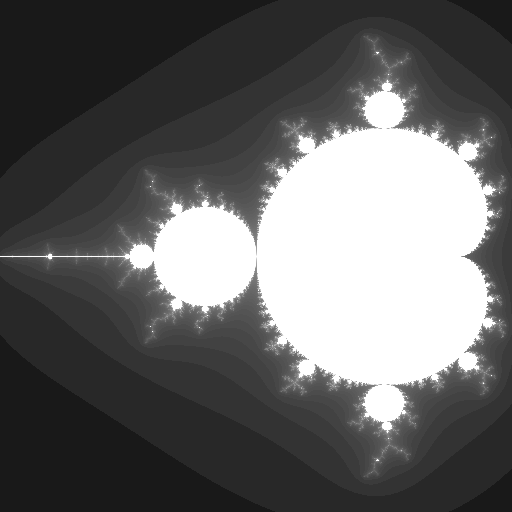

In [8]:
fractal = np.log(np.array(ns))
fractal = 255 * fractal / fractal.max()
display_array(fractal)